# Introdução

<img src="../imgs/machine_learning_xkcd.png" width="300">

## Bem vindos !

### Quem sou eu

![](../imgs/andre-barbosa.jpg)

- Formado em SI pela EACH/USP

- Cientista de Dados @QuintoAndar

- Instrutor de DS na Tera

Contatos:
- email: abarbosa0494@gmail.com
- linkedin: https://www.linkedin.com/in/barbosaandre/ 



### Preparando o Ambiente

Antes de mais nada vamos deixar as coisas instalando :)

In [1]:
!which python

/Users/abarbosa/miniconda3/envs/semcomp2019/bin/python


In [2]:
# conda create -f enviroment.yml

## O miniconda

![](https://media.giphy.com/media/2lbhL8dSGMh8I/giphy.gif)


O miniconda é uma espécie de ambiente virtual do python. Com ele nós podemos **isolar** todo o nosso ambiente de desenvolvimento (ou seja, onde estamos desenvolvendo) de forma a garantirmos que todos estamos usando **exatamente** as mesmas versões de bibliotecas, mesma versão do python e etc

## Warmup!



Antes das aula começar, vamos fazer um leve warmup


<img src="https://media.giphy.com/media/kga3oCyjSFrPrxBj1q/giphy.gif" width="400">


Quais as expectativas de vocês para a aula de hoje:

- 

- 

- 

- 

### Bora começar !

<img src="https://media.giphy.com/media/xT1R9Mu1CCG7HiIezK/giphy.gif" width="400">



# O problema

Como eu trabalho no QuintoAndar, uma boa forma de dar uma ideia inicial do que a gente pode trabalhar é com dados imobiliários. 

Uma competição muito clássica no Kaggle e legal pra quem tá começando é o [Boston House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). E vai ser com ele que vamos trabalhar hoje :)

Primeiro, vamos aos dados

In [3]:
!ls ..

data            environment.yml imgs            notebooks


In [4]:
!ls ../data

data_description.txt house-prices.csv


Para facilitar nossa vida, vamos isolar em uma variável

In [5]:
DATAPATH = '../data'

In [6]:
!cat {DATAPATH}/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

O conjunto de dados (ou **dataset**), contém informações sobre as casas e o preço delas. Dêem uma lida nesse txt e vamos discutir, o que vocês acham que têm de interessante?

![](https://media.giphy.com/media/kPtv3UIPrv36cjxqLs/giphy.gif)

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

## Explorando linha a linha

Para analisar conjuntos de dados, é comum usarmos a biblioteca `pandas` do python :) E, por enquanto, vamos olhar só o **train.csv**

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)

In [9]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Podemos puxar algumas estatísticas legais rapidamente

In [12]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [13]:
data.shape

(1460, 80)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [15]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [16]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Percebam que o describe só apresenta informações sobre features numéricas, podemos colocar features não numéricas com o parâmetro include

In [17]:
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Podemos contar os valores das variáveis categóricas com o `value_counts()`

In [18]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [19]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

### Algumas operações

In [20]:
data[:1]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [21]:
data[-1:]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [22]:
data.sort_values(by='SalePrice', ascending=False).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


In [23]:
tmp = data[['MSSubClass', 'Street', 'SaleCondition', 'SalePrice']]

In [24]:
tmp.sort_values(by='SalePrice', ascending=False).head()

,MSSubClass,Street,SaleCondition,SalePrice
Id,,,,
692,60,Pave,Normal,755000
1183,60,Pave,Abnorml,745000
1170,60,Pave,Normal,625000
899,20,Pave,Partial,611657
804,60,Pave,Partial,582933


In [25]:
tmp.sort_values(by='SalePrice', ascending=True).head()

,MSSubClass,Street,SaleCondition,SalePrice
Id,,,,
496,30,Pave,Abnorml,34900
917,20,Pave,Abnorml,35311
969,50,Pave,Abnorml,37900
534,20,Pave,Normal,39300
31,70,Pave,Normal,40000


## Acessando valores

Como vimos acima, podemos acessar valores específicos do dataframe se passamos a foma `data[coluna]`. Se queremos passar mais de uma, lembrem-se de fazer com dois colchetes: `data[[coluna1, coluna2]]`

Um pandas **Dataframe** é uma composição de pandas **Series**. Quando acessamos um dado na forma de  `data[coluna]`, estamos acessando a sua Series

![](../imgs/dataframe-vs-series.png)
Source:https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

## Nos fazendo perguntas

Agora que temos alguns dados, que tal nos fazermos perguntas sobre eles?

- Qual é a média do valor de venda de casas?

In [26]:
data['SalePrice'].mean()

180921.19589041095

- E o menor e maior?

In [27]:
data['SalePrice'].min(), data['SalePrice'].max()

(34900, 755000)

Qual é a média de Garage Area **e** número de Carros?

In [28]:
data[['GarageCars', 'GarageArea']].head()

,GarageCars,GarageArea
Id,,
1,2,548
2,2,460
3,2,608
4,3,642
5,3,836


In [29]:
data[['GarageCars', 'GarageArea']].mean()

GarageCars      1.767123
GarageArea    472.980137
dtype: float64

In [30]:
data.YearBuilt.sample()

Id
120    2005
Name: YearBuilt, dtype: int64

E se quisermos fazer perguntas específicas?

- Qual é a média do valor de venda de casas em que a qualidade da cozinha (kitchen quality) é excelente? E Fair?

In [31]:
data[data['KitchenQual']=='Ex']['SalePrice'].mean()

328554.67

In [32]:
data[data['KitchenQual']=='Fa']['SalePrice'].mean()

105565.20512820513

- A média da qualidade de cozinha sendo um ou outro do tipo acima

In [33]:
data[(data['KitchenQual']=='Ex') | (data['KitchenQual']=='Fa')]['SalePrice'].mean()

265989.28057553957

obs: percebam que é diferente do que eu fazer o seguinte:

In [34]:
(328554.67+105565.20512820513)/2

217059.93756410255

Quero a segunda e terceira linha desse dataset

In [35]:
data.loc[1:2,'LotArea':'Alley']

,LotArea,Street,Alley
Id,,,
1,8450,Pave,NaN
2,9600,Pave,NaN


In [36]:
data.iloc[0:2,3:6]

,LotArea,Street,Alley
Id,,,
1,8450,Pave,NaN
2,9600,Pave,NaN


O primeiro método, *loc*, faz a busca tanto de linha, quanto por coluna pelo **nome**, enquanto o *iloc* faz essa mesma busca pelo **número**. Quando você quer a **posição** exata e não sabe o nome, o iloc é o melhor.

Geralmente, o iloc é usado quando queremos operar sobre linhas e o loc, sobre colunas

PS: Nesse caso, como o índice do nosso dataset é número, a manipulação de linhas acaba sendo igual e percebam que os números sempre são não inclusivos

In [37]:
index_sale_price= data.set_index('SalePrice')

In [38]:
index_sale_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
SalePrice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
208500,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
181500,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
223500,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
140000,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
250000,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [39]:
index_sale_price.loc[208500:181500,'LotArea':'Alley']

,LotArea,Street,Alley
SalePrice,,,
208500,8450,Pave,NaN
181500,9600,Pave,NaN


## Modificando os tipos e alterando dados

Vimos que a coluna MSSubClass estão sendo tratada como inteiros, quando seria melhor ter ela como uma string (ou alguma coisa que não seja um número). Como alteramos isso?

In [40]:
data['MSSubClass'] = data['MSSubClass'].astype('str')

In [41]:
data[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual     int64
OverallCond     int64
dtype: object

Outra coisa que pode nos ajudar a interpretar é alterar o square foot dos dados para metros quadrados.

Em uma pesquisa rápida no google, vemos que **10.76391041671 square feet in 1 square meter**. Ou seja, para obtermos o resultado em metros quadrados, bata dividir o valor por 10.76391041671

In [42]:
square_feet_cols = [
    "LotArea",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
]

FEET_TO_M2 = 10.76391041671

In [43]:
for col in square_feet_cols:
    data[col] = data[col]/FEET_TO_M2

# Pensando em mais perguntas

Com base no que vimos agora, tente responder às seguintes perguntas

1. Qual a quantidade de cada tipo de MSSubClass

2. Qual a média de preços de uma casa com Overall Quality sendo 10? E 1?

3. Qual a média de preços de uma casa construida depois dos anos 2000? E Entre os anos 80 e 90?

4. Qual a média de preços de uma casa com OverallCond sendo 9 ou 10 E  MSZoning Residential Low Density?

5. Qual a porcentagem de cada tipo de MSSubClass

# Agregações


Uma outra forma de podermos olhar para os nossos dados é por meio de **funções de agregação** que nada mais são do que formas de "agrupar" os nossos conjuntos de acordo com algum critério

Em geral, funções de agregação do pandas funcionam seguindo a seguinte estrutura:

df.groupby(by=grouping_columns)[columns_to_show].function()

Vamos a um exemplo?

Queremos ver, agregado por Overall Quality, a média de LotArea das casas, o ano de construcao e preço de venda

In [44]:
data.groupby(by='OverallQual')['LotArea', 'YearBuilt', 'SalePrice'].mean()

,LotArea,YearBuilt,SalePrice
OverallQual,,,
1,697.701830,1934.000000,50150.000000
2,728.359834,1935.000000,51770.333333
3,776.534705,1932.700000,87473.750000
4,828.507709,1948.284483,108420.655172
5,943.277327,1954.732997,133523.347607
6,931.506241,1967.636364,161603.034759
7,1028.975432,1988.269592,207716.423197
8,1031.580425,1996.821429,274735.535714
9,1247.147693,2005.116279,367513.023256


E se quisermos agrupar mais coisas? Como agrupar pelo tipo da venda?

In [45]:
data.groupby(by=["SaleType", "OverallQual"])["LotArea", "YearBuilt", "SalePrice"].mean()

LotArea    YearBuilt      SalePrice
SaleType OverallQual                                         
COD      4             911.899079  1943.800000  100330.000000
         5             813.754122  1953.647059  123352.941176
         6             847.957014  1966.266667  154620.000000
         7            1411.197178  1962.333333  180466.666667
         8            1000.441870  1988.333333  243833.333333
CWD      6             830.088662  1940.000000  147000.000000
         7            1219.352400  1940.000000  219500.000000
         9             475.570662  1999.000000  328900.000000
Con      7             802.682266  2009.000000  215200.000000
         8            1007.626372  1993.000000  324000.000000
ConLD    3            1229.571734  1925.000000   83000.000000
         5            1007.068954  1925.000000  142500.000000
         6             631.926478  1960.666667  121466.666667
         7             678.285095  2003.000000  198500.000000
         8            1108.519073  2007.000000  235128.000000
ConLI    4             975.481920  1971.000000  115000.000000
         5             845.417664  1963.000000  125000.000000
         6             948.632941  1961.000000  155000.000000
         10           1252.147173  2008.000000  451950.000000
ConLw    2             568.566605  1936.000000   60000.000000
         5             843.931215  1941.000000   95000.000000
         7             761.185574  1973.000000  187833.333333
New      4             413.975946  1920.000000  113000.000000
         5             786.795846  2006.500000  151000.000000
         6             778.976507  2006.166667  170502.500000
         7             871.143728  2006.391304  218601.956522
         8            1039.529778  2006.756757  308515.243243
         9            1231.943494  2007.411765  420539.176471
         10           2270.165414  2007.142857  351770.142857
Oth      4             792.648737  1973.500000  133025.000000
         5             995.177364  1991.000000   93500.000000
WD       1             697.701830  1934.000000   50150.000000
         2             808.256448  1934.500000   47655.500000
         3             726.197257  1933.555556   87970.833333
         4             827.781715  1948.074766  108234.542056
         5             950.067085  1954.581769  134078.469169
         6             943.714818  1966.600000  162075.897059
         7            1056.640467  1985.628788  206317.231061
         8            1029.566973  1994.055556  265475.222222
         9            1288.349630  2003.800000  332999.760000
         10           1608.430332  1979.600000  498025.000000

É interessante ver que apenas alguns tipos de venda aprensentam a overall Quality como 10:

- WD (Warranty Deed); [Significado](https://www.investopedia.com/terms/w/warranty-deed.asp)
- New (Home just constructed and sold);
- ConLi (Contract Low Interest)

E se quisermos coisas além da média, podemos usar o agg

In [46]:
data.groupby(by=["SaleType"])["LotArea", "YearBuilt", "SalePrice"].agg(['sum', 'max', 'mean'])

LotArea                            YearBuilt        \
                   sum           max         mean       sum   max   
SaleType                                                            
COD       3.834759e+04   2238.034234   891.804368     84277  2005   
CWD       3.355100e+03   1219.352400   838.775097      7819  1999   
Con       1.810309e+03   1007.626372   905.154319      4002  2009   
ConLD     8.155865e+03   1672.254720   906.207220     17592  2007   
ConLI     4.970313e+03   1252.147173   994.062528      9864  2008   
ConLw     3.696055e+03    990.996728   739.210909      9796  2007   
New       1.267047e+05   5935.296516  1038.563084    244727  2010   
Oth       2.580475e+03    995.177364   860.158280      5938  1991   
WD        1.236866e+06  19996.914845   976.216052   2494036  2009   

                       SalePrice                         
                 mean        sum     max           mean  
SaleType                                                 
COD       1959.930233    6190850  287000  143973.255814  
CWD       1954.750000     842400  328900  210600.000000  
Con       2001.000000     539200  324000  269600.000000  
ConLD     1954.666667    1249028  235128  138780.888889  
ConLI     1972.800000    1001950  451950  200390.000000  
ConLw     1959.200000     718500  212000  143700.000000  
New       2005.959016   33543341  611657  274945.418033  
Oth       1979.333333     359550  150000  119850.000000  
WD        1968.457774  219700127  755000  173401.836622

Esses "e+" representam notação científica

In [47]:
3.834759e+04, 1.236866e+06

(38347.59, 1236866.0)

# E agora, o que fazer?

Percebam que o trabalho de EDA é extremamente investigativo, então, agora, invoquem o lado Sherlock de vocês e vamos ter ideias de quetipo de estatísticas podem ser interessante vermos

![](https://media.giphy.com/media/McjDXkZKw2v8A/giphy.gif)

In [48]:
"""O que olhar e o que fazer?"""

'O que olhar e o que fazer?'

# Indo um pouco além

E se quisésemos ter uma noção de como os nossos dados podem variar em relação à média? Para isso, usamos o conceito de **desvio padrão**

In [49]:
from IPython.core.display import HTML
from IPython.display import YouTubeVideo

Passar em 1.5x velocidade

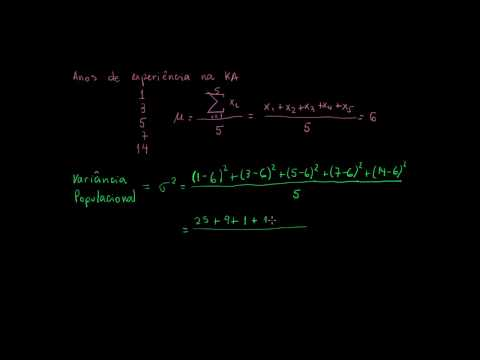

In [50]:
YouTubeVideo('ngNrB_7FLGo')


O problema da variância, é que a unidade que ela retorna é em relação ao **quadrado** da unidade que estamos avaliando. Para ter uma noção de **dispersão em relação a média** é comum tirarmos a raiz desse valor, obtendo o $\sigma$, que é o desvio padrão. 

[Referência bacana para pegar a intuição](https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/introduction-to-standard-deviation)

Para saber o desvio padrão dos nossos dados, basta usar o método `std`, também do pandas

In [51]:
data['SalePrice'].std()

79442.50288288662

O desvio padrão do preço da venda é muito alto. Isso quer dizer que os nossos dados estão **muito dispersos**. Mas será que temos alguma forma de apresentar esses dados melhor? De visualizar eles de uma maneira mais inteligente?


![](https://media.giphy.com/media/JsnfknYH1jIdm74lJf/giphy.gif)


Sim !

# Visualização de Dados

Antes disso, é bom fazermos uma leve reflexão

Mostrar até os 06:15



In [52]:
HTML(
    '<div style="max-width:854px"><div style="position:relative;height:0;padding-bottom:56.25%"><iframe src="https://embed.ted.com/talks/david_mccandless_the_beauty_of_data_visualization" width="854" height="480" style="position:absolute;left:0;top:0;width:100%;height:100%" frameborder="0" scrolling="no" allowfullscreen></iframe></div></div>'
)

O python tem uma **série de bibliotecas** que permitem que a gente faça uma exploração visual dos nossos dados, vamos ver elas agora

In [53]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
from scipy import stats

# We will use the Seaborn library
import seaborn as sns
sns.set()

Primeiro, o próprio pandas tem uma função de plot

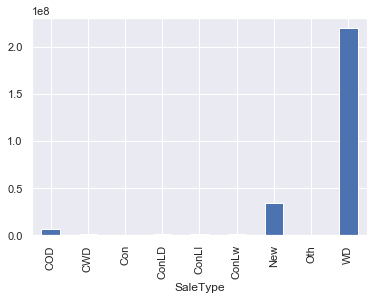

In [54]:
data.groupby(['SaleType'])['SalePrice'].sum().plot(kind='bar');

In [55]:
2.0e+8

200000000.0

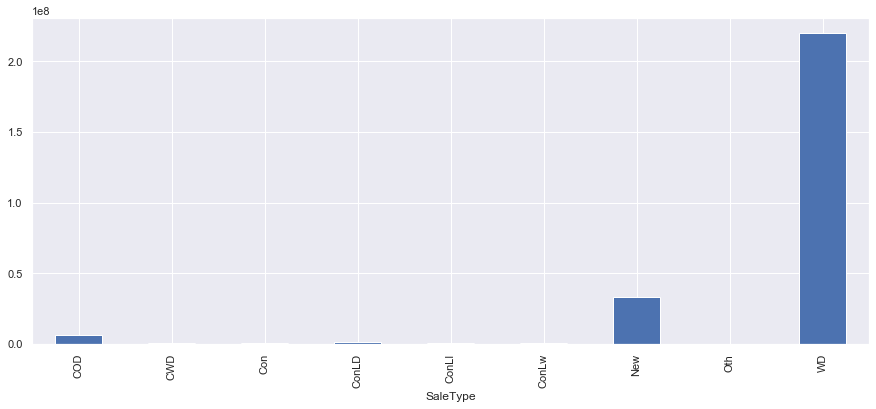

In [56]:
#aumenta o tamanho da imagem
plt.figure(figsize=(15,6))
_ = data.groupby(['SaleType'])['SalePrice'].sum().plot(kind='bar');


###  Análises Univariadas e Multivariadas
O processo de análise visual geralmente pode ser dividio em análises univariadas, em que estamos tentando entender a distribuição de uma única variável e multivariada, em que estamos tentando ver a relação entre duas ou mais variáveis :)

Para todas as coisas agora vamos usar o seaborn, uma lib feita em cima do matplotlib que tem plots ainda mais legais :)

In [57]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,785.030688,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.208996,Gd,TA,PConc,Gd,TA,No,GLQ,65.589546,Unf,0.0,13.935456,79.525002,GasA,Ex,Y,SBrkr,79.525002,79.339196,0.0,158.864198,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,50.910866,TA,TA,Y,0.000000,5.667085,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,891.869184,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,90.859173,Unf,0.0,26.384463,117.243636,GasA,Ex,Y,SBrkr,117.243636,0.000000,0.0,117.243636,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,42.735398,TA,TA,Y,27.685106,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,1045.159200,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,15.050292,Gd,TA,PConc,Gd,TA,Mn,GLQ,45.150877,Unf,0.0,40.319919,85.470797,GasA,Ex,Y,SBrkr,85.470797,80.454033,0.0,165.924829,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,56.485048,TA,TA,Y,0.000000,3.901928,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,887.224032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,20.067057,Unf,0.0,50.167642,70.234698,GasA,Gd,Y,SBrkr,89.279821,70.234698,0.0,159.514520,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,59.643752,TA,TA,Y,0.000000,3.251606,25.269627,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,1324.797350,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,32.516064,Gd,TA,PConc,Gd,TA,Av,GLQ,60.851491,Unf,0.0,45.522490,106.373981,GasA,Ex,Y,SBrkr,106.373981,97.826901,0.0,204.200882,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,77.666941,TA,TA,Y,17.837384,7.803855,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
numerical_cols = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "SalePrice",
]

## Variáveis Numéricas

**Histogramas**

/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


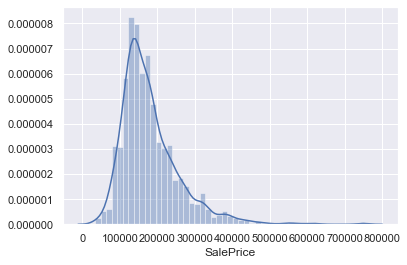

In [59]:
_ = sns.distplot(data["SalePrice"])

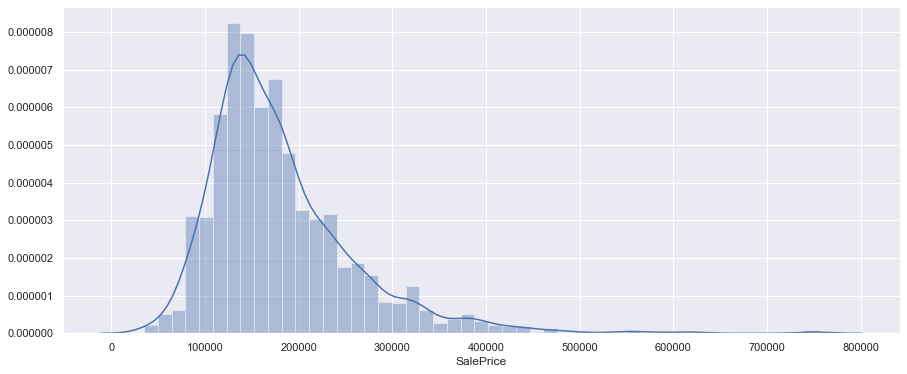

In [60]:
plt.figure(figsize=(15,6))
sns.distplot(data["SalePrice"]);

Essa linha azul é o kde, ou kernel density estimate. A noção matemática dele vai além do escopo dessa aula (mais sobre isso [aqui](https://en.wikipedia.org/wiki/Kernel_density_estimation)), mas ele é um método que tenta estimar uma curva de distribuição para os seus dados. Mas vale lembrar que esses dados só são confiáveis se você tem muitos dados de entrada ao seu dispor

Uma boa forma de olhar a relação entre duas variáveis é através do jointplot, que apresenta um **diagrama de dispersão** (ou scatter plot) no meio e histogramas nos eixos

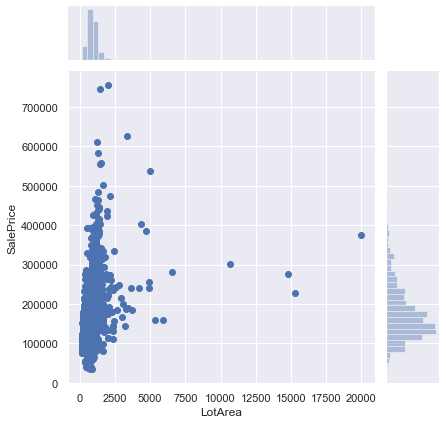

In [61]:
sns.jointplot(x='LotArea', y='SalePrice', 
              data=data, kind='scatter');

E o **pairplot**

In [62]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,785.030688,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.208996,Gd,TA,PConc,Gd,TA,No,GLQ,65.589546,Unf,0.0,13.935456,79.525002,GasA,Ex,Y,SBrkr,79.525002,79.339196,0.0,158.864198,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,50.910866,TA,TA,Y,0.000000,5.667085,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,891.869184,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,90.859173,Unf,0.0,26.384463,117.243636,GasA,Ex,Y,SBrkr,117.243636,0.000000,0.0,117.243636,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,42.735398,TA,TA,Y,27.685106,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,1045.159200,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,15.050292,Gd,TA,PConc,Gd,TA,Mn,GLQ,45.150877,Unf,0.0,40.319919,85.470797,GasA,Ex,Y,SBrkr,85.470797,80.454033,0.0,165.924829,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,56.485048,TA,TA,Y,0.000000,3.901928,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,887.224032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,20.067057,Unf,0.0,50.167642,70.234698,GasA,Gd,Y,SBrkr,89.279821,70.234698,0.0,159.514520,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,59.643752,TA,TA,Y,0.000000,3.251606,25.269627,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,1324.797350,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,32.516064,Gd,TA,PConc,Gd,TA,Av,GLQ,60.851491,Unf,0.0,45.522490,106.373981,GasA,Ex,Y,SBrkr,106.373981,97.826901,0.0,204.200882,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,77.666941,TA,TA,Y,17.837384,7.803855,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


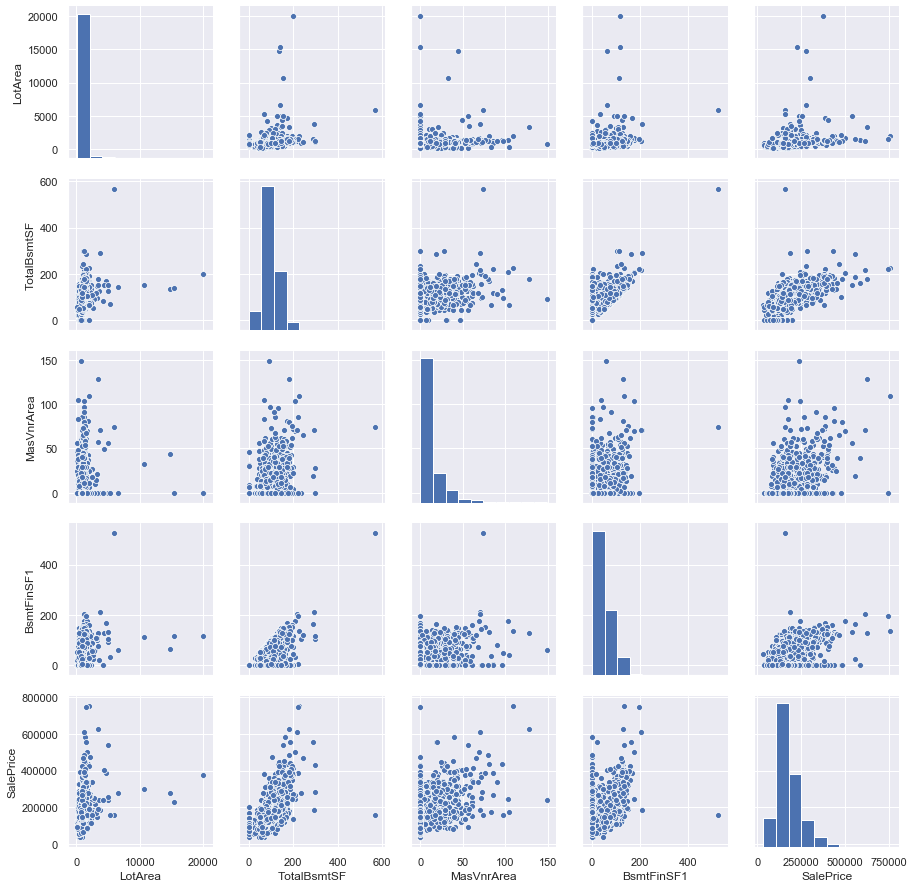

In [63]:
sns.pairplot(data[['LotArea', 'TotalBsmtSF',
                 'MasVnrArea', 
                 'BsmtFinSF1',
                 'SalePrice'
                ]].dropna());

O que podemos ver nesses dados??

### O diagrama de caixa

**Boxplot**

In [64]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,785.030688,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.208996,Gd,TA,PConc,Gd,TA,No,GLQ,65.589546,Unf,0.0,13.935456,79.525002,GasA,Ex,Y,SBrkr,79.525002,79.339196,0.0,158.864198,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,50.910866,TA,TA,Y,0.000000,5.667085,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,891.869184,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,90.859173,Unf,0.0,26.384463,117.243636,GasA,Ex,Y,SBrkr,117.243636,0.000000,0.0,117.243636,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,42.735398,TA,TA,Y,27.685106,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,1045.159200,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,15.050292,Gd,TA,PConc,Gd,TA,Mn,GLQ,45.150877,Unf,0.0,40.319919,85.470797,GasA,Ex,Y,SBrkr,85.470797,80.454033,0.0,165.924829,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,56.485048,TA,TA,Y,0.000000,3.901928,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,887.224032,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,20.067057,Unf,0.0,50.167642,70.234698,GasA,Gd,Y,SBrkr,89.279821,70.234698,0.0,159.514520,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,59.643752,TA,TA,Y,0.000000,3.251606,25.269627,0.0,0.0,0.0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,1324.797350,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,32.516064,Gd,TA,PConc,Gd,TA,Av,GLQ,60.851491,Unf,0.0,45.522490,106.373981,GasA,Ex,Y,SBrkr,106.373981,97.826901,0.0,204.200882,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,77.666941,TA,TA,Y,17.837384,7.803855,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
top_subclass = data['SaleCondition'].value_counts().sort_values(ascending=False).head(5).index.values

In [66]:
top_subclass

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca'], dtype=object)

In [67]:
tmp = data[["SaleCondition","SalePrice"]]

In [68]:
tmp.dtypes

SaleCondition    object
SalePrice         int64
dtype: object

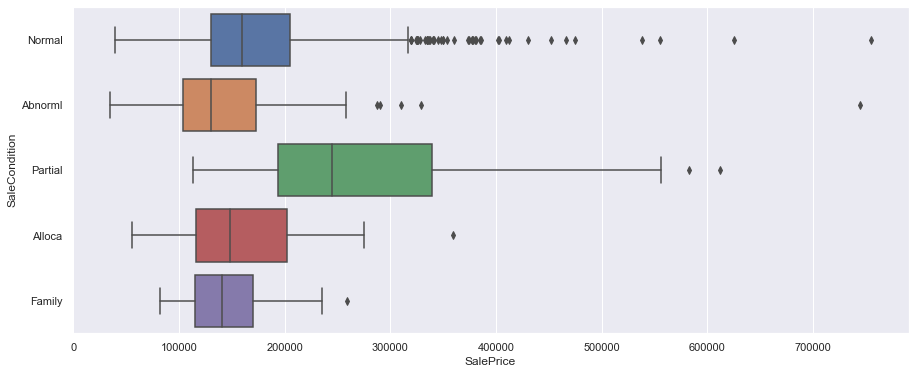

In [69]:
plt.figure(figsize=(15,6))
_ = sns.boxplot(y="SaleCondition", x="SalePrice", 
            data=tmp[tmp['SaleCondition'].isin(top_subclass)])

**Como interpretamos esses dados?**


traduzido do curso mlcouse.ai (mais informações no pós aula)

Um gráfico de boxplot é uma forma de ter uma noção inicial da distribuição dos seus dados. Ele é formado por três componentes, as caixas (box), os whiskers e os pontos individuais (outliers)

O box em si siginifica a distribuição do interquantil da sua amostra: o seu comprimento vai de 25% (Q1) até 75% (Q3) percentils dos seus dados. A linha vertical representa o Q2, ou 50% da sua distribuição, que equivale à mediana.

Os whiskers são as linhas que "saem" do box. Eles representam todos os pontos que caem no intervalo Q1−1.5IQR ou Q3+1.5IQR, onde IQR=Q3-Q1, o intervalo interquantil

Qualquer ponto que cai fora disso é definido como intervalo interquantil

## Categóricas

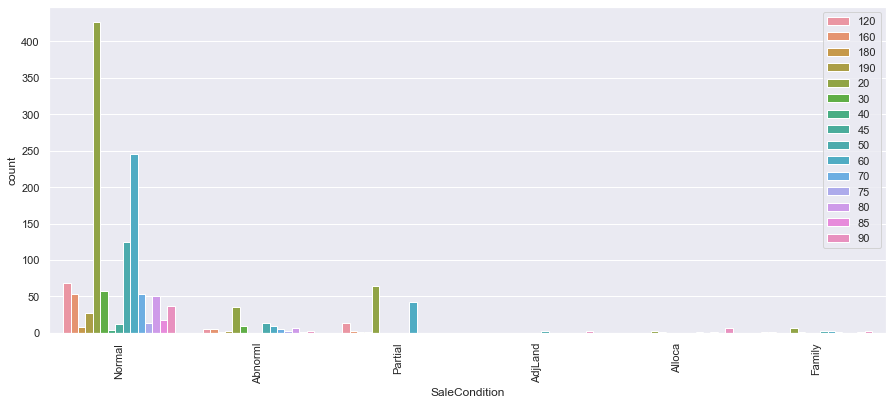

In [70]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='SaleCondition', hue='MSSubClass', data=data);
for item in fig.get_xticklabels():
    item.set_rotation(90)
_ = plt.legend(loc='upper right')

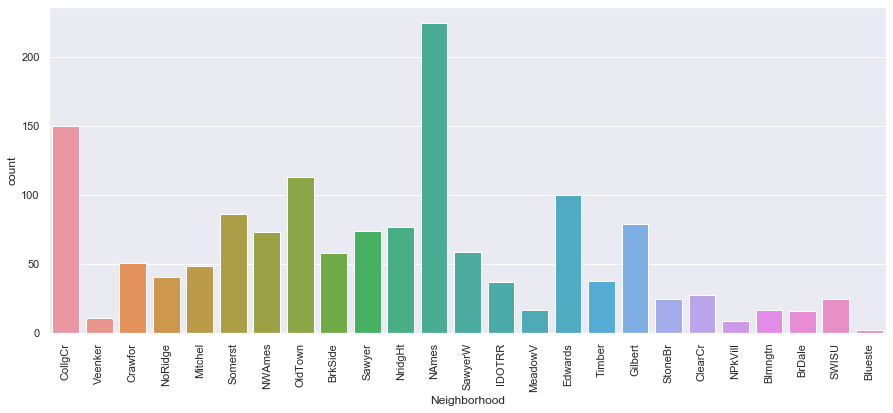

In [71]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='Neighborhood', data=data);
for item in fig.get_xticklabels():
    item.set_rotation(90)

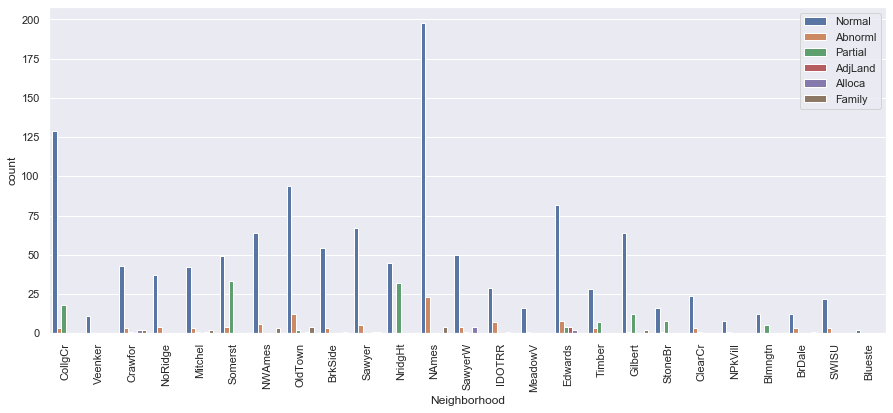

In [72]:
plt.figure(figsize=(15,6))
fig = sns.countplot(x='Neighborhood', hue='SaleCondition', data=data);
for item in fig.get_xticklabels():
    item.set_rotation(90)
_ = plt.legend(loc='upper right')

## Agregações

In [73]:
tmp = data.groupby('Neighborhood')['SalePrice'].sum()

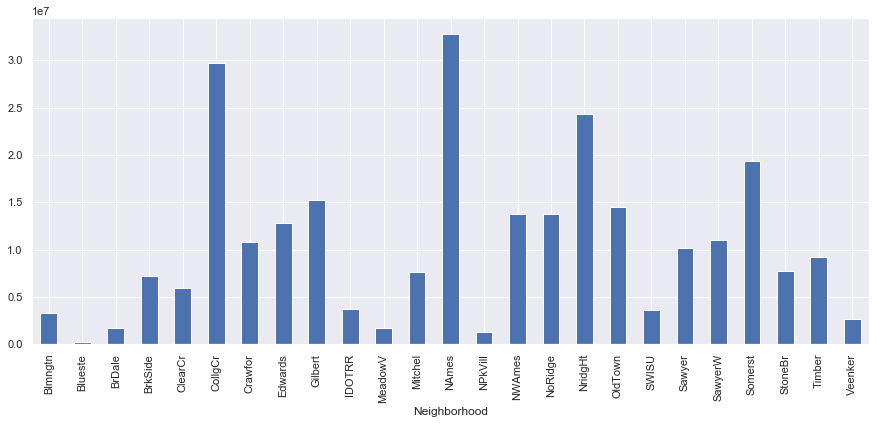

In [74]:
plt.figure(figsize=(15,6))
_ = tmp.plot(kind='bar')

## Heatmap

É uma forma de encontrarmos correlações entre variáveis numéricas

In [75]:
df_corr = data[numerical_cols].dropna().corr()

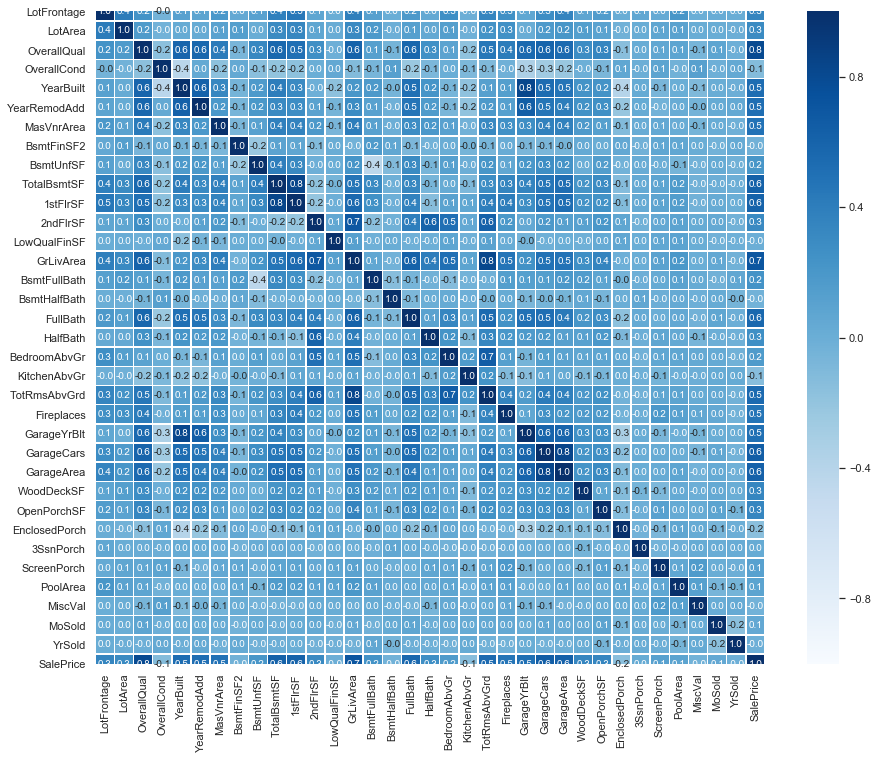

In [76]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr, annot=True, fmt=".1f", linewidths=.5, cmap="Blues", 
            center=0, vmax=1.0, vmin=-1.0);

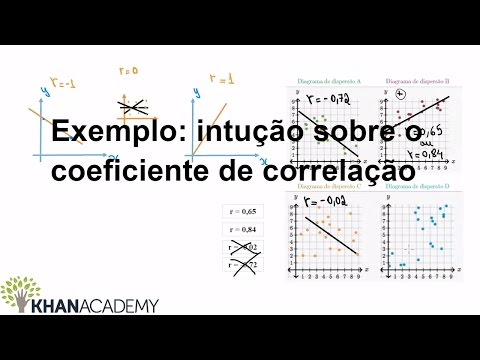

In [77]:
YouTubeVideo('OYVmpo9gemw')

[Referência](https://pt.khanacademy.org/math/ap-statistics/bivariate-data-ap/correlation-coefficient-r/v/correlation-coefficient-intuition-examples)

### Com base nos dados que vocês viram, o que a gente pode ver dos nossos dados?

<img src="https://media.giphy.com/media/MP1kygLQzjCve/giphy.gif" width="400">


Falem mais !

**CORRELATION DOES NOT IMPLIES CAUSATION**

Não é porquê existe uma correlação extremamente positiva entre o Overall Quality e o SalesPrice que uma é a causa do outro!!!!

https://www.tylervigen.com/spurious-correlations

# Concluindo

Aprendemos a fazer uma análise exploratória, a investigar nossos dados e criticar eles!

<img src="https://media.giphy.com/media/dkGhBWE3SyzXW/giphy.gif" width="400">


Mas o que eram esses "modelos lineares" citados no vídeo? 

A idéia por trás dele é: *Será que a gente consegue criar, com base nos nossos dados, um modelo que "aprenda", ou "generalize" nossos dados para podermos **inferir** para situações nunca vistas?* Por exemplo, **será que conseguimos prever o quanto uma casa custará com base apenas nas informações sobre ela?**

![](https://media.giphy.com/media/jjsYglmqf4UHC/giphy.gif)


Cenas dos próximos episódios :)